Gadget Recommendation System

Recommendation System 1:

Gadget popularity based system targetted at new customers relying soley on rating of products alone due to yet unknown nature/choices of newer customers

In [3]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import TruncatedSVD

#using ggplot style for matplotlib as used in R language
plt.style.use("ggplot")


In [ ]:
# Reading data set

sample_rating = pd.read_csv("/content/ratings_Beauty.csv")
# sample_rating.isnull().sum()
sample_rating = sample_rating.dropna()
# sample_rating.isnull().sum()
sample_rating.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1.369699e+09
1,A3JM6GV9MNOF9X,0558925278,3.0,1.355443e+09
2,A1Z513UWSAAO0F,0558925278,5.0,1.404691e+09
3,A1WMRR494NWEWV,0733001998,4.0,1.382573e+09
4,A3IAAVS479H7M7,0737104473,1.0,1.274227e+09


In [ ]:
# Checking total samples
sample_rating.shape

(514723, 4)

In [ ]:
# Creating popular products based on total ratings
popular_products = pd.DataFrame(sample_rating.groupby("ProductId")["Rating"].count())

# Create a sorted table by descending total-ratings of products
most_popular = popular_products.sort_values("Rating",ascending = False)
most_popular.head()


,Rating
ProductId,
B0009V1YR8,2869
B0000YUXI0,2143
B000ZMBSPE,2041
B000FS05VG,1589
B000142FVW,1558


<Axes: xlabel='ProductId'>

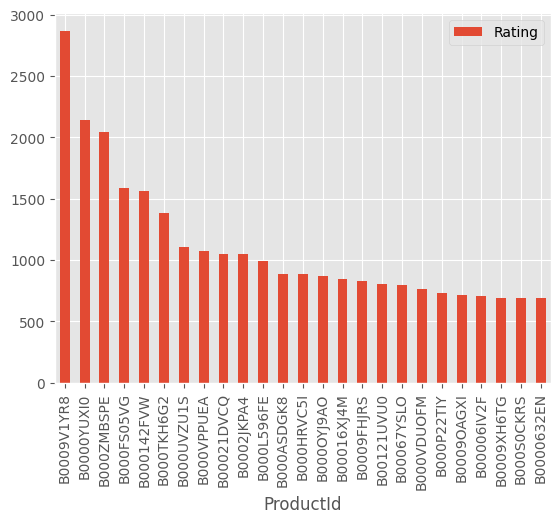

In [ ]:
# Plotting 25 most popular producs using MatPlotLib
most_popular.head(25).plot(kind = "bar")

ANALYSIS : The above graph/Table gives us the most popular producs which can be used for recommendation to newer customers with unknown history and choices

For Example Product = B0009V1YR8 has over 2500+ sales and should be recommended to new customers due to its popularity

RECOMMENDATION SYSTEMS - 2

Recommend Items based on User History and similarity of ratings provided by users who bought items similar to that of a particular customer/user.

In [ ]:
#subset of previously used dataset sample_rating
sample_rating_1 = sample_rating.head(10000)

In [ ]:
# Converted the ratings table into matrix with ProductId as Columns and UserId as rows
rating_matrix = sample_rating_1.pivot_table(values="Rating", index = "UserId", columns = "ProductId", fill_value = 0)
rating_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#  the utility matrix obtaned above is sparce, I have filled up the unknown values wth 0
rating_matrix.shape


(9697, 886)

In [ ]:
#Transposing the Matrix
Transpose = rating_matrix.T
Transpose.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Transpose.shape

(886, 9697)

In [ ]:
#Unique Product in Subset of data
Transpose_1 = Transpose

In [ ]:
#Decomposing the matrix using SVD to retain reduce Dimensionality of the Dataset
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(Transpose)
decomposed_matrix.shape

(886, 10)

In [ ]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [ ]:
# Assuming the customer buys Product ID # 6117036094 (randomly chosen)
Transpose.index[99]

'6117036094'

In [ ]:
# making a product id based on the index of the actual product ID
i = "6117036094"

product_names = list(Transpose.index)
product_ID = product_names.index(i)
product_ID

99

In [ ]:
# Correlation for all items with the item purchased by this customer based on items
#  rated by other customers people who bought the same product

correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [ ]:
# Recommending top 10 highly correlated products in sequence

Recommend = list(Transpose.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i)

Recommend[0:9]

['0558925278',
 '1304482634',
 '1412759676',
 '1879187396',
 '3292000971',
 '4057363823',
 '535795545X',
 '602260074X',
 '6022600804']

Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.

Recommendation System - Part 3

In [1]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [10]:
# Item to item based recommendation system based on product description
# Applicable when business is setting up its E-commerce website for the first time

#importing the necessary dataset
prod = pd.read_csv("/content/amazon.csv")
# prod.head()

#selecting necessary columns containing product ID and product descpription
prod_descriptions = prod[["product_id","about_product"]]
# prod_descriptions.head()
prod.shape

(1465, 16)

In [12]:
# Removing any missing values
prod_descriptions = prod_descriptions.dropna()
prod_descriptions.shape
prod_descriptions.head()

,product_id,about_product
0,B07JW9H4J1,High Compatibility : Compatible With iPhone 12...
1,B098NS6PVG,"Compatible with all Type C enabled devices, be..."
2,B096MSW6CT,【 Fast Charger& Data Sync】-With built-in safet...
3,B08HDJ86NZ,The boAt Deuce USB 300 2 in 1 cable is compati...
4,B08CF3B7N1,[CHARGE & SYNC FUNCTION]- This cable comes wit...


In [16]:
product_descriptions1 = prod_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["about_product"].head(10)

0    High Compatibility : Compatible With iPhone 12...
1    Compatible with all Type C enabled devices, be...
2    【 Fast Charger& Data Sync】-With built-in safet...
3    The boAt Deuce USB 300 2 in 1 cable is compati...
4    [CHARGE & SYNC FUNCTION]- This cable comes wit...
5    Fast Charging & Data Sync: Solero TB301 Type-C...
6    It Ensures High Speed Transmission And Chargin...
7    1m long Type-C USB Cable|Sturdy and Durable. W...
8    USB WiFi Adapter —— Speedy wireless transmissi...
9    Universal Compatibility – It is compatible wit...
Name: about_product, dtype: object

In [17]:
# Feature extraction from product descriptions
# Converting the text in product description into numerical data for analysis

vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["about_product"])
X1

<500x3875 sparse matrix of type '<class 'numpy.float64'>'
	with 33889 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


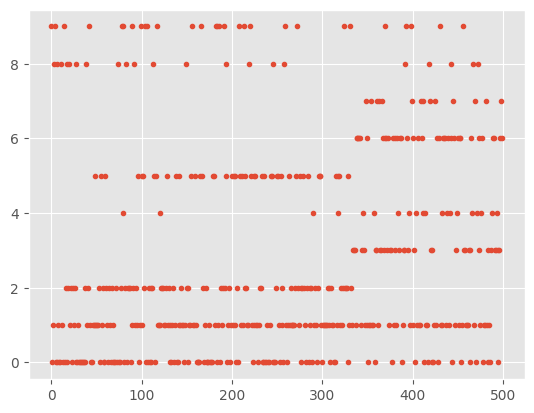

In [18]:
# Visualizing product clusters in subset of data

# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()


In [21]:
# Recommendation of product based on the current product selected by user.
# To recommend related product based on, Frequently bought together.

def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [27]:
# Top words in each cluster based on product description

# # Optimal clusters is

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:\n\n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)
    print("\n\n\n\n")

Top terms per cluster:


Cluster 0:
 watch
 smartwatch
 sports
 health
 modes
 faces
 boltt
 calling
 display
 day





Cluster 1:
 phone
 mobile
 protection
 wireless
 proof
 design
 stand
 added
 usb
 compatible





Cluster 2:
 product
 connect
 ports
 tv
 installation
 warranty
 information
 features
 sound
 usb





Cluster 3:
 camera
 sim
 nano
 storage
 dual
 4g
 battery
 processor
 memory
 display





Cluster 4:
 camera
 f2
 2mp
 50mp
 5g
 core
 display
 battery
 octa
 snapdragon





Cluster 5:
 remote
 tv
 control
 led
 stick
 quality
 batteries
 compatible
 match
 order





Cluster 6:
 usb
 micro
 cable
 external
 digital
 port
 pc
 hard
 phones
 transfer





Cluster 7:
 iphone
 ipad
 pro
 plus
 12
 cable
 max
 charging
 mini
 charge





Cluster 8:
 hdmi
 cable
 male
 audio
 supports
 4k
 xbox
 video
 ethernet
 tv





Cluster 9:
 cable
 usb
 type
 charging
 data
 charge
 fast
 devices
 speed
 sync







In [28]:
# Predicting clusters based on key search words

def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [32]:
# Keyword : iphone (Random) - Can be changed to observe results

show_recommendations("iphone")

Cluster 7:
 iphone
 ipad
 pro
 plus
 12
 cable
 max
 charging
 mini
 charge


In [33]:
show_recommendations("samsung")

Cluster 1:
 phone
 mobile
 protection
 wireless
 proof
 design
 stand
 added
 usb
 compatible


In [34]:
show_recommendations("usb")

Cluster 6:
 usb
 micro
 cable
 external
 digital
 port
 pc
 hard
 phones
 transfer


Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.

Hence the 3 Model based Recommendations System is Complete